In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve

import numpy as np
import pandas as pd
import seaborn

# 335 OTUs in total and 490 samples
otuinfile = 'glne007.final.an.unique_list.0.03.subsample.0.03.filter.shared'
mapfile = 'metadata.tsv'
disease_col = 'dx'

# Data reading
data = pd.read_table(otuinfile,sep='\t',index_col=1)
filtered_data = data.dropna(axis='columns', how='all')
X = filtered_data.drop(['label','numOtus'],axis=1)
metadata = pd.read_table(mapfile,sep='\t',index_col=0)
y = metadata[disease_col]
# Inner join metadata and OTU
merge = pd.concat([X, y], axis=1,join='inner')
# Filter adenoma
merge = merge.loc[merge[disease_col].isin(['normal','cancer'])]

y = merge[disease_col]
X = merge.drop([disease_col],axis=1)

In [12]:
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y),
index=y.index, name=y.name)

A, P, Y, Q = train_test_split(
X, y, test_size=0.15, random_state=42)	# Can change to 0.2

clf = RandomForestClassifier(
	n_estimators=7000,random_state=0,criterion='entropy',min_samples_split=20).fit(A, Y.values.ravel())
print ("Accuracy of Random Forest Classifier: "+str(clf.score(P,Q)))

# algorithm, learning_rate_init, alpha, hidden_layer_sizes 
# and activation have impact
clf2 = MLPClassifier(solver='adam', alpha=0.01, max_iter=1000,
	learning_rate='adaptive', hidden_layer_sizes=(400,), 
	random_state=0, learning_rate_init=1e-2,
	activation='logistic').fit(A, Y.values.ravel())
print ("Accuracy of Multi-layer Perceptron Classifier: "+str(clf2.score(P,Q)))

clf3 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1,
max_depth=10, random_state=0, min_samples_split=5).fit(A, Y.values.ravel())
print ("Accuracy of Gradient Boosting Classifier: "+str(clf3.score(P,Q)))

clf4 = SVC(kernel='rbf',C=1,
	gamma=0.001,random_state=0,probability=True).fit(A, Y.values.ravel())
print ("Accuracy of SVM: "+str(clf4.score(P,Q)))

clf5 = GaussianNB().fit(A, Y.values.ravel())
print ("Accuracy of Gaussian Naive Bayes Classifier: "+str(clf5.score(P,Q)))

Accuracy of Random Forest Classifier: 0.75
Accuracy of Multi-layer Perceptron Classifier: 0.636363636364
Accuracy of Gradient Boosting Classifier: 0.704545454545
Accuracy of SVM: 0.522727272727
Accuracy of Gaussian Naive Bayes Classifier: 0.75


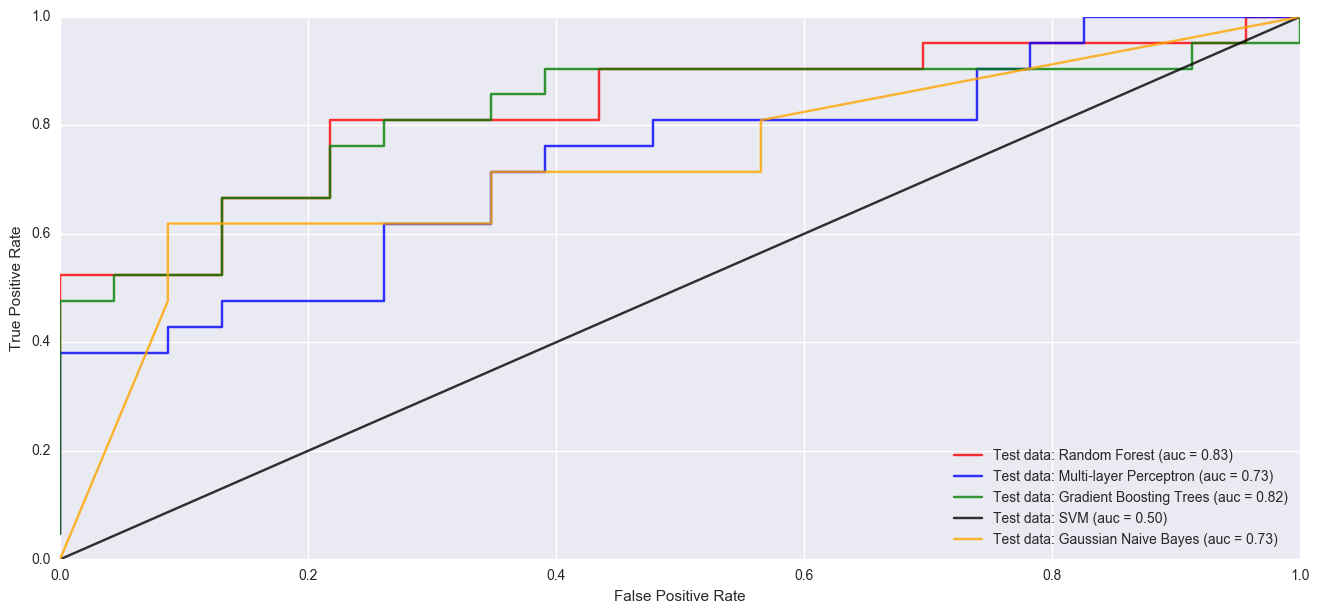

In [13]:
%matplotlib inline
# Only 2-class problem
cls = 0
# Set figure size and plot layout
figsize=(16,7)
f, ax = plt.subplots(1, 1, figsize=figsize)

params = [(clf,'red',"Random Forest"),(clf2,'blue',"Multi-layer Perceptron"),(clf3,'green',"Gradient Boosting Trees"),
         (clf4,'black',"SVM"),(clf5,'orange','Gaussian Naive Bayes')]

for x in params:
    y_true = Q[Q.argsort().index]
    y_prob = x[0].predict_proba(P.ix[Q.argsort().index,:])
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, cls], pos_label=cls)
    roc_auc = roc_auc_score(y_true == cls, y_prob[:, cls])
    ax.plot(fpr, tpr, color=x[1], alpha=0.8,
    label='Test data: {} '
    '(auc = {:.2f})'.format(x[2] ,roc_auc))


ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")

In [14]:
# Data reading
data = pd.read_table(otuinfile,sep='\t',index_col=1)
filtered_data = data.dropna(axis='columns', how='all')
X = filtered_data.drop(['label','numOtus'],axis=1)
metadata = pd.read_table(mapfile,sep='\t',index_col=0)
y = metadata[disease_col]
## Merge adenoma and normal in one-category called no-cancer, so we have binary classification
y = y.replace(to_replace=['normal','adenoma'], value=['no-cancer','no-cancer'])

encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y),
index=y.index, name=y.name)


In [15]:
A, P, Y, Q = train_test_split(
X, y, test_size=0.15, random_state=42)	# Can change to 0.2

clf = RandomForestClassifier(
	n_estimators=7000,random_state=0,criterion='entropy',min_samples_split=20).fit(A, Y.values.ravel())
print ("Accuracy of Random Forest Classifier: "+str(clf.score(P,Q)))

# algorithm, learning_rate_init, alpha, hidden_layer_sizes 
# and activation have impact
clf2 = MLPClassifier(solver='adam', alpha=0.01, max_iter=1000,
	learning_rate='adaptive', hidden_layer_sizes=(400,), 
	random_state=0, learning_rate_init=1e-2,
	activation='logistic').fit(A, Y.values.ravel())
print ("Accuracy of Multi-layer Perceptron Classifier: "+str(clf2.score(P,Q)))

clf3 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1,
max_depth=10, random_state=0, min_samples_split=5).fit(A, Y.values.ravel())
print ("Accuracy of Gradient Boosting Classifier: "+str(clf3.score(P,Q)))

clf4 = SVC(kernel='rbf',C=1,
	gamma=0.001,random_state=0,probability=True).fit(A, Y.values.ravel())
print ("Accuracy of SVM: "+str(clf4.score(P,Q)))

clf5 = GaussianNB().fit(A, Y.values.ravel())
print ("Accuracy of Gaussian Naive Bayes Classifier: "+str(clf5.score(P,Q)))

Accuracy of Random Forest Classifier: 0.878378378378
Accuracy of Multi-layer Perceptron Classifier: 0.864864864865
Accuracy of Gradient Boosting Classifier: 0.837837837838
Accuracy of SVM: 0.837837837838
Accuracy of Gaussian Naive Bayes Classifier: 0.621621621622


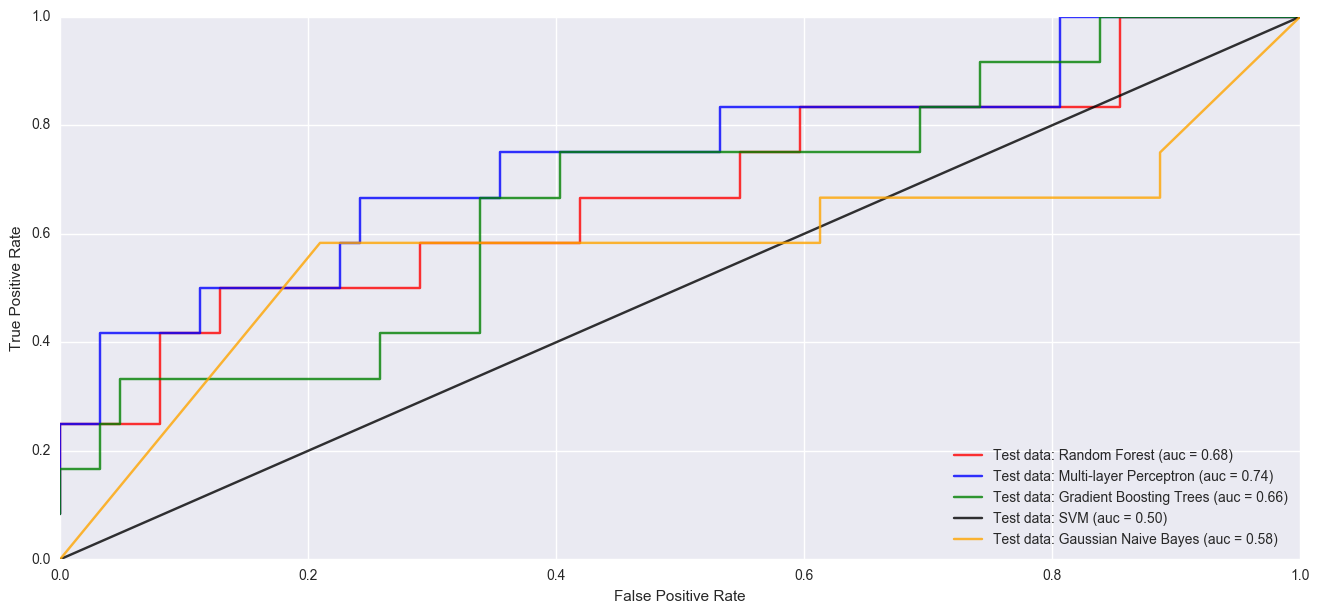

In [17]:
%matplotlib inline
# Only 2-class problem
cls = 0
# Set figure size and plot layout
figsize=(16,7)
f, ax = plt.subplots(1, 1, figsize=figsize)

params = [(clf,'red',"Random Forest"),(clf2,'blue',"Multi-layer Perceptron"),(clf3,'green',"Gradient Boosting Trees"),
         (clf4,'black',"SVM"),(clf5,'orange','Gaussian Naive Bayes')]

for x in params:
    y_true = Q[Q.argsort().index]
    y_prob = x[0].predict_proba(P.ix[Q.argsort().index,:])
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, cls], pos_label=cls)
    roc_auc = roc_auc_score(y_true == cls, y_prob[:, cls])
    ax.plot(fpr, tpr, color=x[1], alpha=0.8,
    label='Test data: {} '
    '(auc = {:.2f})'.format(x[2] ,roc_auc))


ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")